In [5]:
# 대응하는 두표본의 차를 검정하기 

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# 복용전 : 74,75,75,76,76,78,78,79,81,82
# 복용후 : 70,71,73,73,75,76,76,77,78,80

SyntaxError: invalid syntax (<ipython-input-17-7cd5ced8030d>, line 1)

In [21]:
before = [74,75,75,76,76,78,78,79,81,82 ]
after = [70,71,73,73,75,76,76,77,78,80 ]


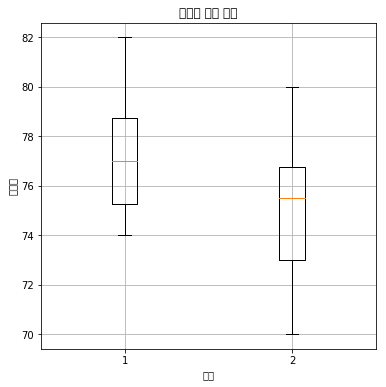

In [22]:

plt.figure(figsize = (6,6))
plt.boxplot([before,after])
plt.xlabel('언제')
plt.ylabel('몸무게')
plt.title('몸무게 박스 플롯')
plt.grid()
plt.show()

In [23]:
w = ['before','after']

In [24]:
when = [w[j] for j in range(2) for i in range(10)]

In [25]:
when

['before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'after',
 'after',
 'after',
 'after',
 'after',
 'after',
 'after',
 'after',
 'after',
 'after']

In [26]:
df = pd.DataFrame({'when':when , 'weight':before + after})
df

,weight,when
0,74,before
1,75,before
2,75,before
3,76,before
4,76,before
5,78,before
6,78,before
7,79,before
8,81,before
9,82,before


In [27]:
import seaborn as sns 
#회면 스타일 설정 

In [28]:
sns.set_style('whitegrid')

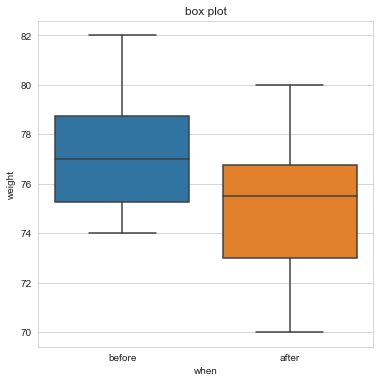

In [30]:
plt.figure(figsize =(6,6))
sns.boxplot(x='when',y='weight',data=df)
plt.title('box plot')
plt.show()

In [31]:
#정규성 문제 확인 

from scipy.stats import shapiro 
normal1 = shapiro(before)
normal2 = shapiro(after)

In [32]:
normal1 , normal2

((0.9318515658378601, 0.4663497805595398),
 (0.9741033911705017, 0.9260663986206055))

In [33]:
#  0.4663497805595398 , 0.9260663986206055  ==> 0.05보다 크므로 정규성 문제는 없음
#정규분포를 이룸 

In [36]:
#등분산성 테스트 
from scipy.stats import bartlett
import numpy as np 

bartlett(before,after)

BartlettResult(statistic=0.22060507741514057, pvalue=0.6385792660242243)

In [ ]:
# BartlettResult(statistic=0.22060507741514057, pvalue=0.6385792660242243)
# 둘 간 등분산성 채택 

In [37]:
from scipy.stats import levene
levene(before,after)

LeveneResult(statistic=0.17016806722689057, pvalue=0.6848341733019565)

In [38]:
# LeveneResult(statistic=0.17016806722689057, pvalue=0.6848341733019565)


In [40]:
from scipy.stats import ttest_rel
#귀무가설 : 두 집단간 평균 차이가 없다.
# 연구가설 : 두 집단간 평균 차이가 있다 

In [44]:
ttest_rel(before, after)

Ttest_relResult(statistic=8.134892168199606, pvalue=1.936206358629518e-05)

In [ ]:
#카이제곱 분포 
#정규분포를 다르는 모집단에서 크기가 n인 표본을 무작위로 반복하여 추출 했을때 
#각 표본의 표본분산들은 x^2 분포를 따른다 

$$
    f(\chi^2) = \frac {1}{ \Gamma (\frac {\nu}{2})2^{\frac{\nu}{2}}} \chi^{\frac{\nu}{2}-1}e^{-\frac{\chi^2}{2}} , (\chi^2 >0)
$$


In [45]:
#0보다 큰 범위
import numpy as np 
chi2 = np.linspace(0.5,50,100)
chi2

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])

In [46]:
# 자유도 v  일단 1  y
import math

In [49]:

nu = 1 
y = (1/math.gamma(nu/2)*(1/2**(nu/2)))*(chi2**(nu/2-1))*np.exp(- chi2/2)
y

array([4.39391289e-01, 2.41970725e-01, 1.53866323e-01, 1.03776874e-01,
       7.22889571e-02, 5.13934433e-02, 3.70561845e-02, 2.69954833e-02,
       1.98217149e-02, 1.46449826e-02, 1.08747403e-02, 8.10869555e-03,
       6.06731190e-03, 4.55334292e-03, 3.42590351e-03, 2.58337317e-03,
       1.95186176e-03, 1.47728280e-03, 1.11982323e-03, 8.50036660e-04,
       6.46054843e-04, 4.91579850e-04, 3.74427618e-04, 2.85464792e-04,
       2.17828423e-04, 1.66350556e-04, 1.27132161e-04, 9.72265050e-05,
       7.44031069e-05, 5.69712597e-05, 4.36477621e-05, 3.34575564e-05,
       2.56589345e-05, 1.96871345e-05, 1.51117348e-05, 1.16044210e-05,
       8.91456681e-06, 6.85071163e-06, 5.26649361e-06, 4.04995548e-06,
       3.11540631e-06, 2.39722257e-06, 1.84512229e-06, 1.42055949e-06,
       1.09397119e-06, 8.42674022e-07, 6.49256001e-07, 5.00346265e-07,
       3.85673341e-07, 2.97343903e-07, 2.29290115e-07, 1.76845954e-07,
       1.36422261e-07, 1.05257410e-07, 8.12259113e-08, 6.26914484e-08,
      

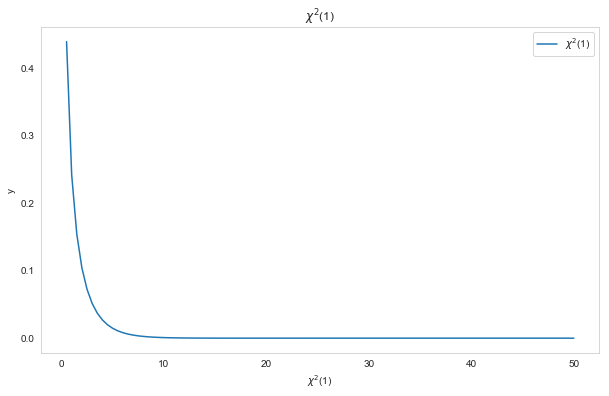

In [54]:
plt.figure(figsize=(10,6))
plt.plot(chi2,y,label = r'$\chi^2$(1)')
plt.xlabel(r'$\chi^2$(1)')
plt.ylabel('y')
plt.title(r'$\chi^2$(1)')
plt.grid()
plt.legend()
plt.show()

In [56]:
import scipy.stats as stats 

In [57]:
y1 = stats.chi2(1).pdf(chi2)
y1

array([4.39391289e-01, 2.41970725e-01, 1.53866323e-01, 1.03776874e-01,
       7.22889571e-02, 5.13934433e-02, 3.70561845e-02, 2.69954833e-02,
       1.98217149e-02, 1.46449826e-02, 1.08747403e-02, 8.10869555e-03,
       6.06731190e-03, 4.55334292e-03, 3.42590351e-03, 2.58337317e-03,
       1.95186176e-03, 1.47728280e-03, 1.11982323e-03, 8.50036660e-04,
       6.46054843e-04, 4.91579850e-04, 3.74427618e-04, 2.85464792e-04,
       2.17828423e-04, 1.66350556e-04, 1.27132161e-04, 9.72265050e-05,
       7.44031069e-05, 5.69712597e-05, 4.36477621e-05, 3.34575564e-05,
       2.56589345e-05, 1.96871345e-05, 1.51117348e-05, 1.16044210e-05,
       8.91456681e-06, 6.85071163e-06, 5.26649361e-06, 4.04995548e-06,
       3.11540631e-06, 2.39722257e-06, 1.84512229e-06, 1.42055949e-06,
       1.09397119e-06, 8.42674022e-07, 6.49256001e-07, 5.00346265e-07,
       3.85673341e-07, 2.97343903e-07, 2.29290115e-07, 1.76845954e-07,
       1.36422261e-07, 1.05257410e-07, 8.12259113e-08, 6.26914484e-08,
      

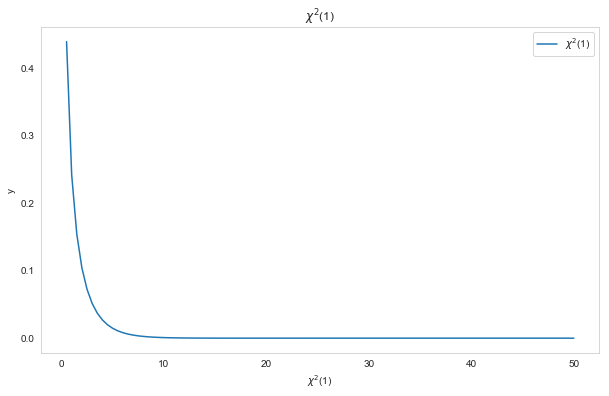

In [58]:
plt.figure(figsize=(10,6))
plt.plot(chi2,y1,label = r'$\chi^2$(1)')
plt.xlabel(r'$\chi^2$(1)')
plt.ylabel('y')
plt.title(r'$\chi^2$(1)')
plt.grid()
plt.legend()
plt.show()

In [63]:
dof = [1,2,3,4,5,10,20,30]

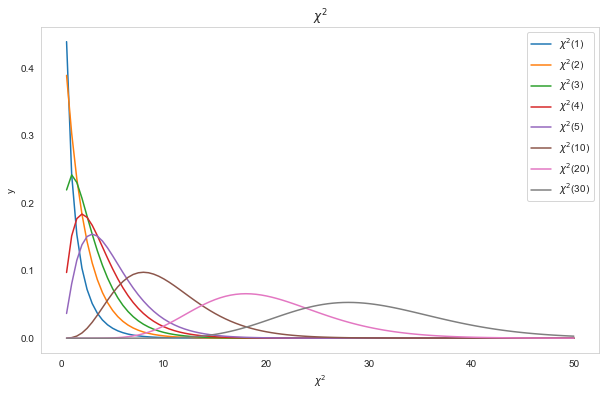

In [81]:
plt.figure(figsize=(10,6))
for i in dof:
    y = stats.chi2(i).pdf(chi2)
    plt.plot(chi2,y,label = r'$\chi^2$('+str(i)+')')
    plt.legend()
 
plt.title(r'$\chi^2$')
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
# 30 이상되면 종모양
#영국의 통계학자 Karl Pearson 1895~1916 

In [ ]:
#어떤 확률변수가 특정 분포를 따른다는 적합도 검정 
#범주형 자료 분석 

#표본분산의 s^2 의 분포 


In [82]:
# F 분포 
# 분산이 같은 두 정규모집단으로부터 크기 n1 ,n2 인 확률표본을 반복하여 
# 독립적으로 추출한 후 두 표본의 분산의 비율들의 표본분포는 자유도 v1 , v2 인 f분포를 따른다

# 확률밀도함수
$$
f(x) = \frac {\sqrt{ \frac {(\nu_1 x)^{\nu_1 } \nu_2^{\nu_2}}{(\nu_1 x + \nu_2)^{(\nu_1 + \nu_2)}}}}{xB(\frac{\nu_1}{2}, \frac{\nu_2}{2})} , (x > 0)
$$

$$
B(x_1 , x_2) = \frac {\Gamma(x_1)\Gamma(x_2)}{\Gamma(x_1 + x_2)}
$$


In [84]:
import numpy as np 
x= np.linspace(0,5,201)
x

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
       1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
       1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
       1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725, 1.75 , 1.775,
       1.8  , 1.825, 1.85 , 1.875, 1.9  , 1.925, 1.95 , 1.975, 2.   ,
       2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  , 2.225,
       2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425, 2.45 ,
       2.475, 2.5  , 2.525, 2.55 , 2.575, 2.6  , 2.625, 2.65 , 2.675,
       2.7  , 2.725, 2.75 , 2.775, 2.8  , 2.825, 2.85 , 2.875, 2.9  ,
       2.925, 2.95 , 2.975, 3.   , 3.025, 3.05 , 3.075, 3.1  , 3.125,
       3.15 , 3.175,

In [85]:
#자유도 4 , 자유도 50 
import scipy.special as sp 
import math 

nu1 =4 
nu2 =50

y=(np.sqrt(((nu1*x)**nu1 *nu2**nu2/((nu1*x +nu2)**(nu1+nu2))))/(x*sp.beta(nu1/2,nu2/2)))

AttributeError: 'float' object has no attribute 'sqrt'

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


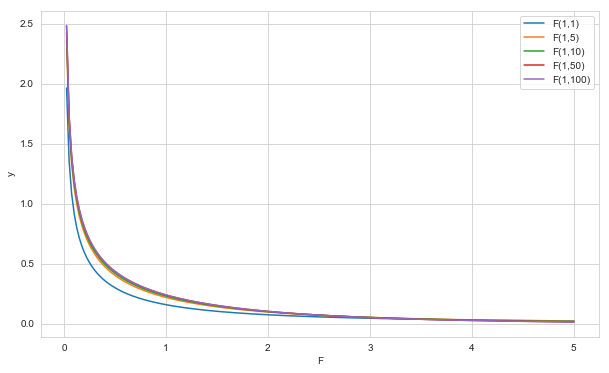

In [89]:
import matplotlib.pyplot as plt 
%matplotlib inline

nuList = [1,5,10,50,100]
nuList2 =nuList

plt.figure(figsize=(10,6))
for nu in nuList2:
    plt.plot(x,stats.f(nuList[0],nu).pdf(x),label ='F('+str(nuList[0])+','+str(nu)+')')
#     plt.plot(x,stats.f(nuList[0],nu).pdf(x),label ='F( '+str(nuList[0]+','+str(nu)+' )'))

plt.xlabel('F')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


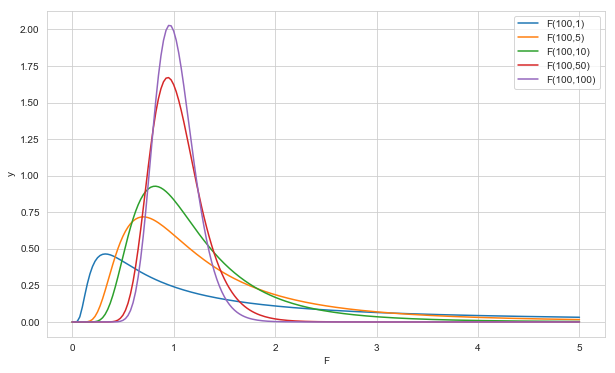

In [95]:
import matplotlib.pyplot as plt 
%matplotlib inline

nuList = [1,5,10,50,100]
nuList2 =nuList

plt.figure(figsize=(10,6))
for nu in nuList2:
    plt.plot(x,stats.f(nuList[4],nu).pdf(x),label ='F('+str(nuList[4])+','+str(nu)+')')
#     plt.plot(x,stats.f(nuList[0],nu).pdf(x),label ='F( '+str(nuList[0]+','+str(nu)+' )'))

plt.xlabel('F')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# ANOVR (ANalysis Of Variance) 분산을 이용한 분석 방법 

#3개의 독립집단간의 차이를 비교 


In [97]:
import scipy.stats as stats 
import matplotlib.pyplot as plt
import numpy as np 

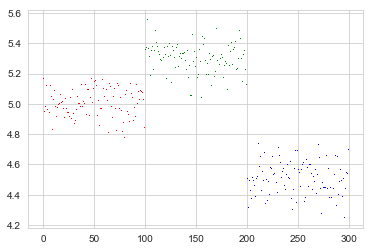

In [109]:
centers = [5,5.3,4.5]
std = 0.1
colors = 'rgb'

data = []
for i in range(3):
    data.append(stats.norm(centers[i],std).rvs(100))
    plt.plot(np.arange(len(data[i]))+i*len(data[0]),data[i],',',color=colors[i])
# data

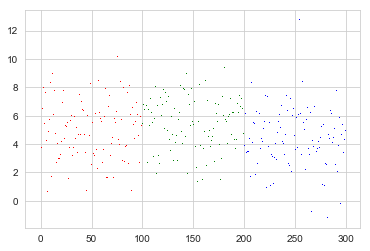

In [110]:
std2 =2 
data2 = []
for i in range(3):
    data2.append(stats.norm(centers[i],std2).rvs(100))
    plt.plot(np.arange(len(data2[i]))+i*len(data2[0]),data2[i],',',color=colors[i])
# data

# 일원배치 분산분석의 가정 
- 독립성 : 자료의 추출은 독립적으로 이루어져야함 
- 정규성 : 자료의 모집단 분포는 정규분포를 따라야함 
- 등분산성 : 모든 집단의 모분산은 동일함


In [112]:
# 22명의 심장 우회수술을 받은 환자들을 3가지 그룹으로 나눠
# 1 : 50% 아산화질소와 50% 산소 혼합물 24시간 동안 흡인한 환자
# 2 : 50% 아산화질소와 50% 산소 혼합물 수술받는 동안 흡인한 환자
# 3 : 30~50% 산소 혼합물 24시간 동안 흡입한 환자


import urllib 
url='https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url),delimiter=',')
data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

In [113]:
group1 = data[data[:,1]==1,0]
group1

array([243., 251., 275., 291., 347., 354., 380., 392.])

In [116]:
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

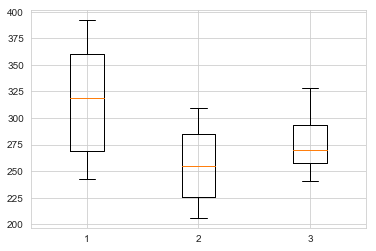

In [117]:
plot_data = [group1 ,group2 ,group3]
ax = plt.boxplot(plot_data)
plt.show()

In [123]:
#1.정규성
from scipy.stats import shapiro
shapiro(group1),shapiro(group2),shapiro(group3)

((0.9070392847061157, 0.3336853086948395),
 (0.946901798248291, 0.6561065912246704),
 (0.9635528922080994, 0.832481324672699))

In [124]:
#2. 등분산성
from scipy.stats import bartlett
bartlett(group1,group2,group3)

BartlettResult(statistic=2.095059428100749, pvalue=0.3508032640105389)

#분산분석 
$
    \frac {SSG}{SSE} ~ F(SSG의 자유도 , SSE의 자유도)
$

In [129]:
# ANOVA 테이블

요인   제곱합 (SS) 자유도(df)  평균제곱(ms)   F-value       p-value
---------------------------------------------------------------------
집단간  SSG         dfG        MSG=SSG/dfc   F= MSG/MSE       p(F>=Fo)
집단내  SSE         df         MSE=SSE/dfeE 
전체    SST         dfr 

SyntaxError: invalid syntax (<ipython-input-129-def9c94ec5ef>, line 3)

In [ ]:
# 귀무가설 :  집단 1 , 집단 2 , 집단 3 의 차이가 없다 
# 대립가설(연구가설) : 집단 1 , 진단2 , 집단3 차이가 있다 . 적어도 1개 이상 차이가 있다 . not 귀무가설  

In [125]:
F_statics,p_value = stats.f_oneway(group1 , group2, group3)

In [126]:
F_statics, p_value

(3.7113359882669763, 0.043589334959178244)

In [164]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 144F-541F

 C:\Users\user\notebook 디렉터리

2020-10-21  오후 02:43    <DIR>          .
2020-10-21  오후 02:43    <DIR>          ..
2020-10-21  오전 09:41    <DIR>          .ipynb_checkpoints
2020-10-14  오전 10:11    <DIR>          __pycache__
2020-10-07  오후 04:53            21,346 201007.ipynb
2020-10-15  오후 07:46           206,701 201008.ipynb
2020-10-13  오후 06:32            37,296 201013.ipynb
2020-10-14  오후 05:18           371,647 201014.ipynb
2020-10-15  오후 07:38           514,026 201015.ipynb
2020-10-16  오후 02:33           444,417 201016.ipynb
2020-10-19  오후 06:00           217,119 201019.ipynb
2020-10-20  오후 05:52           435,402 201020.ipynb
2020-10-21  오후 02:43           234,601 201021.ipynb
2020-10-21  오후 02:06            54,879 anova.png
2020-10-21  오후 02:06            10,152 anova2.png
2020-10-13  오후 04:20                47 cat.csv
2020-10-16  오후 02:40           452,985 ch.dbf
2020-10-16  오후 02:40            33,028 ch.shp
2020-10-16  오후 04:55      

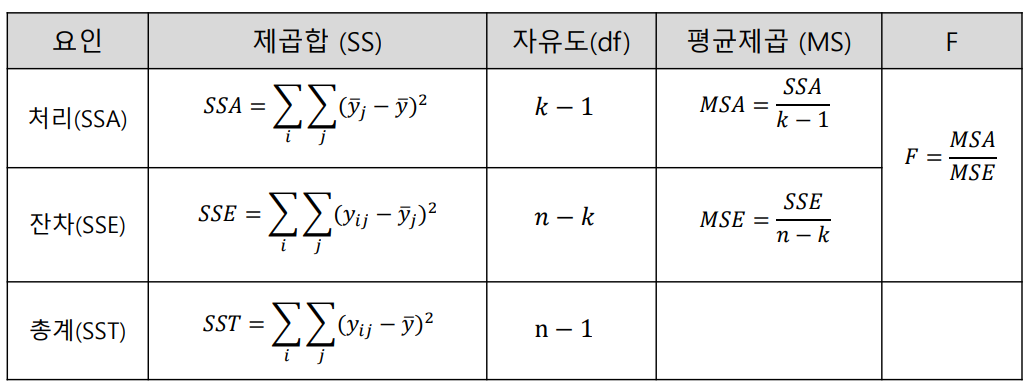

In [167]:
from IPython.display import Image
Image('anova2.png')
Image('anova.png')

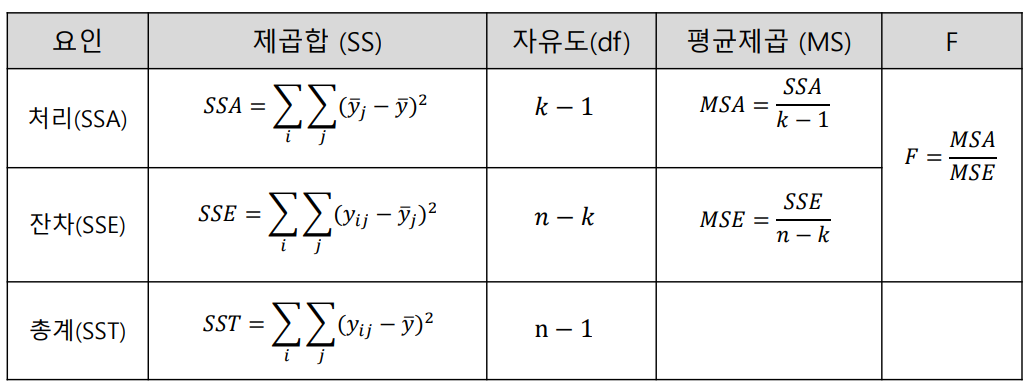

In [168]:
Image('anova.png')

In [162]:
# 그렇다면 사후 검정을 해야한다.
#Tuckey's Honestly Significant Difference :
#HSD

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd 

In [139]:
df = pd.DataFrame(data, columns =['value','treatment'])
hsd = pairwise_tukeyhsd(df['value'],df['treatment'],alpha = 0.05)


In [140]:
hsd.summary()

group1,group2,meandiff,lower,upper,reject
1.0,2.0,-60.1806,-116.6056,-3.7555,True
1.0,3.0,-38.625,-104.8246,27.5746,False
2.0,3.0,21.5556,-43.2141,86.3252,False


In [141]:
# method : 교육방법
# survey : 만족도조사

# 이론교육 
# 실습교육
# 혼합


In [142]:
import pandas as pd

In [172]:
df1 = pd.read_csv('three_sample.csv')
df1

,no,method,survey,score
0,1,1,1,3.2
1,2,2,0,
2,3,3,1,4.7
3,4,1,0,
4,5,2,1,7.8
5,6,3,1,5.4
6,7,1,0,
7,8,2,0,8.4
8,9,3,1,4.4
9,10,1,0,2.8


In [186]:
group1 = df1[df1['method']==1]['survey']
group2 = df1[df1['method']==2]['survey']
group3 = df1[df1['method']==3]['survey']

shapiro(group1),shapiro(group2),shapiro(group3)
bartlett(group1,group2,group3)
F_statics, p_value = stats.f_oneway(group1,group2,group3)
F_statics, p_value

three_hsd = pairwise_tukeyhsd(df1['survey'],df1['method'],alpha=0.05)
three_hsd.summary()

group1,group2,meandiff,lower,upper,reject
1,2,0.06,-0.1506,0.2706,False
1,3,0.1,-0.1106,0.3106,False
2,3,0.04,-0.1706,0.2506,False


In [187]:
# # 용어정리
# 요인(factor) : 집단을 구별하는 독립변수를 분산분석의 맥락에서 요인이라 함 
# 수준 : 요인의 수준 예) 요인이 성별 : 수준 남,여
# 상호작용 : 한 요인의 수준에 다른 종속 변수의 차이가 또 다른 요인의 수준에 따라 
#     달라질때, '요인들 간 상호작용이 존재한다'고 한다. 
# 일원분산분석 : 요인이 1개인 분산분석
# 이원분산분석 : 요인이 2개인 분산분석 
    
#튀기는 온도 , 방법, 상호작용이 없다 
#온도에 따라 맛은 차이가 없다 
#튀기는 방법에 따라 맛은 차이가 없다.




In [ ]:
#이원 배치 분산분석 방법



In [188]:
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_12_6.txt'
url

'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_12_6.txt'

In [198]:
data = np.genfromtxt(urllib.request.urlopen(url),delimiter= ',')
# data
df = pd.DataFrame(data,columns=['head_size','fetus','observer'])
df
#태아별 머리둘레
df.tail()



,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


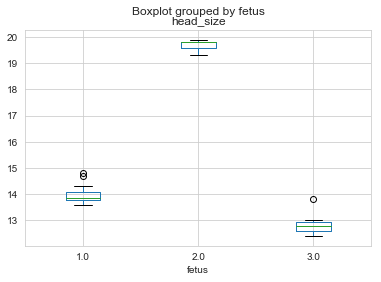

In [199]:
#태아별 머리 둘래 plot

df.boxplot(column ='head_size', by ='fetus')

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

formula = 'head_size ~ C(fetus) + C(observer)+ C(fetus):C(observer)'


In [200]:
lm = smf.ols(formula,df).fit()
lm

In [201]:
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(observer),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(fetus):C(observer),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


In [ ]:
# 귀무가설 : 각 요인별 차이가 없다. 
# 대립가설 : 있다 
    
 

p-value : 0.05 귀무가설을 기각 
측정자와 태아의 머리둘레값에는 연관성이 없다고 할 수 있다. 
측중하는 사람이 달라도 머리 둘레값은 일정하다



In [214]:
# poison.csv 파일 읽어서
# 데이터 프레임으로 만들고 
# 집계 
data = pd.read_csv('poisons.csv',index_col=0)
data
# poison 요인 구분한 표본수 
#treat 요인의로 구분한 표본수
# poison, treat , time

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A
6,0.29,2,A
7,0.40,2,A
8,0.23,2,A
9,0.22,3,A
10,0.21,3,A


In [215]:
data.groupby('poison').agg(len)

,time,treat
poison,,
1,16.0,16
2,16.0,16
3,16.0,16


In [217]:
data.groupby('treat').agg(len)

,time,poison
treat,,
A,12.0,12
B,12.0,12
C,12.0,12
D,12.0,12


In [218]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [221]:
model = ols('time ~ C(poison)+C(treat)+C(poison):C(treat)',data).fit()

In [222]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(poison),2.0,1.033012,0.516506,23.221737,3.331440e-07
C(treat),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(poison):C(treat),6.0,0.250138,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


In [ ]:
poison : F (2,23.221737) 3.331440e-07 < 0.05 : 유의미 하다 
treat  : F (3,13.805582) 3.777331e-06 < 0.05 : 유의미 하다
poison:treat : F (6,1.874333) 1.122506e-01 > 유의미하지 않다 

독립변수 종속변수 사이의 관계가 직선적형 형태의 관계가 있다면 선형회귀 

회귀모형
    y = wx + b 
    모형적합도 : 식사량과 체중의 관계
    회귀 계수: 독립변수의 변화 조속변수를 얼마나 변화 ?
    

In [225]:
# 선형회귀 사전조사
df= pd.read_csv('cars.csv')
df

df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [227]:
#산점도 그리기 

import seaborn as sns 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


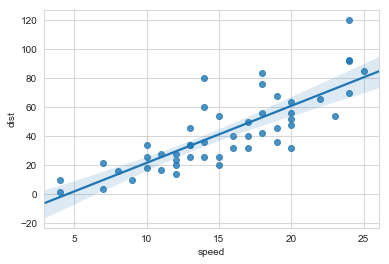

In [228]:
sns.regplot('speed','dist',data = df)

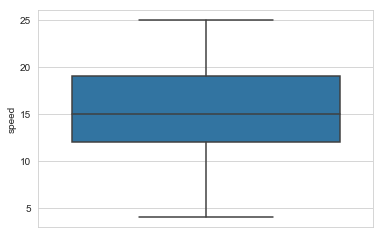

In [236]:
#boxplot 극단치 찾기

sns.boxplot('speed',data= df,orient = 'v')


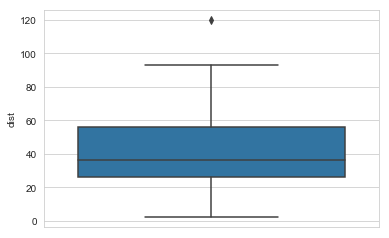

In [238]:

sns.boxplot('dist',data= df,orient = 'v')


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'dist')

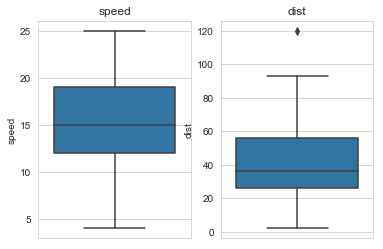

In [240]:
#1행 2열 형태로 2개 그래프 
fig , (ax1,ax2) = plt.subplots(1,2)

sns.boxplot('speed',data=df , ax=ax1,orient='v')
ax1.set_title('speed')
sns.boxplot('dist',data=df,ax=ax2,orient='v')
ax2.set_title('dist')

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'dist')

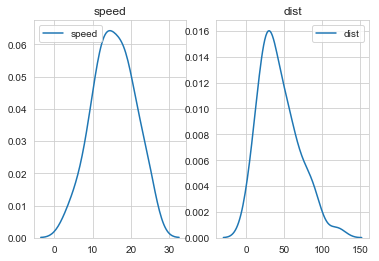

In [243]:
#1행 2열 형태로 2개 그래프 
fig , (ax1,ax2) = plt.subplots(1,2)

sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('speed')
sns.kdeplot(df['dist'],ax=ax2)
ax2.set_title('dist')

In [244]:
#외도 첨도 

In [245]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [246]:
import scipy.stats as stats

stats.skew(df['speed'])
#마이너스쪽으로 약간 기울어져 있다.

-0.11395477012828319

In [247]:
stats.skew(df['dist'])

0.7824835173114966

In [248]:
# 회귀분석 시작
from statsmodels.formula.api import ols

In [249]:
#종속변수 ~ 독립변수 

In [250]:
res = ols('dist ~ speed', data = df).fit()
res

In [251]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.49e-12
Time:                        17:45:11   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#모형이 데이터에 잘 맞는 정도 
# R-squared : ---> 0.651
#R제곱
#dist의 분산을 speed가 65%설명한다 

In [ ]:
#F-statistic :89.57   1.49e-12
dist = -17.5791 + 3.9324 * speed 

In [ ]:
#F 분포 파라미터 2개  F값 p-value 유의수준
dist에 대해여 speed로 예측하는 회귀분석을 실시한 결과 ,
이 회귀모형은 통계적으로 유의미하였다.(F(1,48) =89.57 p<0.05)

speed 회귀계수는 3.9324로 , dist에 대하여 유의미한 예측변인인 것으로 나타났다.
t(48) = 9.464 , p<0.05


